In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.1 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [4]:
hmsp = yf.Ticker("HMSP.JK")
print("Nama Perusahaan               : ", hmsp.info['longName'])
print("Kode Tricker                  : ", 'HMSP.JK')
print("Industry                      : ", hmsp.info['industry'])
print("Exchange                      : ", hmsp.info['exchange'])
print("Analysts recommendations      : ", hmsp.info['recommendationKey'])

print("Peformance company:\n", "-------------------------------------------------------")
print("Beta                          : ", hmsp.info['beta'])
print("Financial Currency            : ", hmsp.info['currency'])
print("52 Week High                  : ", hmsp.info['fiftyTwoWeekHigh'])
print("50 Day Average                : ", hmsp.info['fiftyDayAverage'])
print("Day High                      : ", hmsp.info['dayHigh'])
print("Day Low                       : ", hmsp.info['dayLow'])
print("Market Capitalization         : ", hmsp.info['marketCap'])
print("Regular Market Previous Close : ", hmsp.info['regularMarketPreviousClose'])
print("Regular Market Price          : ", hmsp.info['regularMarketPrice'])
print("Sustainability                : ", hmsp.sustainability)
print("Number Of Analyst Opinions    : ", hmsp.info['numberOfAnalystOpinions'])
print("ISIN code                     : ", hmsp.isin)

print("-------------------------------------------------------")
print("Institutional holders:\n", hmsp.institutional_holders)
print("-------------------------------------------------------")
print("Major holders        :\n", hmsp.major_holders)
print("-------------------------------------------------------")
print("Historical market data(Today):\n", hmsp.history(period="today"))
print("-------------------------------------------------------")
print("Historical market data(Higher High):\n", hmsp.history(period="max"))

Nama Perusahaan               :  PT Hanjaya Mandala Sampoerna Tbk
Kode Tricker                  :  HMSP.JK
Industry                      :  Tobacco
Exchange                      :  JKT
Analysts recommendations      :  hold
Peformance company:
 -------------------------------------------------------
Beta                          :  0.588512
Financial Currency            :  IDR
52 Week High                  :  1195
50 Day Average                :  928
Day High                      :  0
Day Low                       :  0
Market Capitalization         :  104104613380096
Regular Market Previous Close :  900
Regular Market Price          :  895
Sustainability                :  None
Number Of Analyst Opinions    :  14
ISIN code                     :  -
-------------------------------------------------------
Institutional holders:
                        Holder   Shares Date Reported  % Out       Value
0  Gardner Russo & Quinn, LLC  5000000    2022-06-30    0.0  4475000000
--------------------

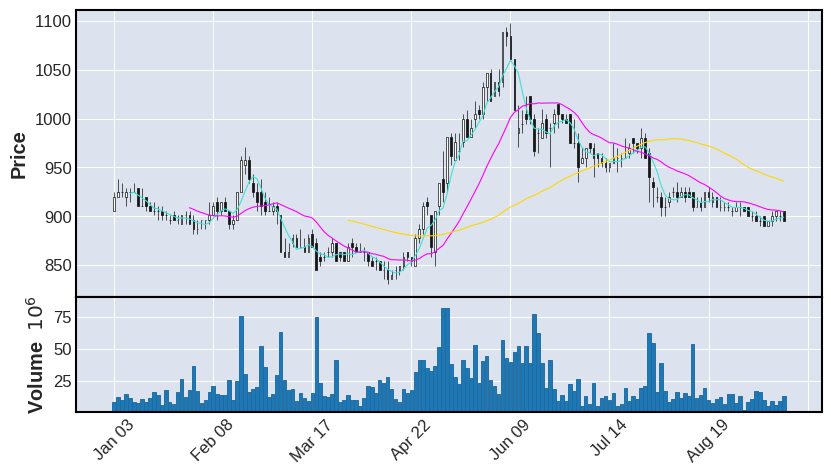

In [5]:
#Candle stick pattern
ticker = "HMSP.JK"
history = yf.Ticker(ticker).history(period="ytd")
mpf.plot(history, type='candle', mav =(5,20,60), figratio=(18,10), volume=True)

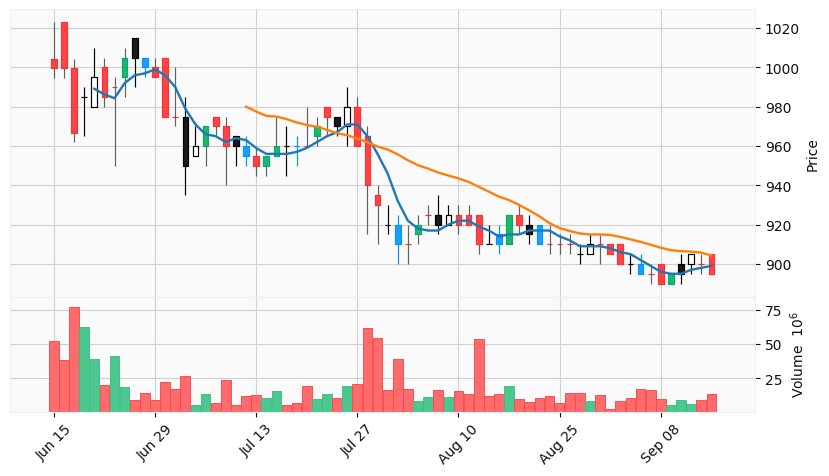

In [6]:
history_price_hmsp = hmsp.history(period="3mo")
history_price_hmsp['MCOverrides'] = [None]*len(history_price_hmsp)

mc = mpf.make_marketcolors(base_mpf_style='blueskies')
for ts in history_price_hmsp.index:
    if 0 == ts.weekday():
        history_price_hmsp.loc[ts,'MCOverrides'] = 'black'
    elif 1 == ts.weekday():
        history_price_hmsp.loc[ts,'MCOverrides'] = [mc]

#With Marketcolor Overrides
mco = history_price_hmsp['MCOverrides'].values
mpf.plot(history_price_hmsp, volume=True, type='candle', style='yahoo', marketcolor_overrides=mco, figratio=(18,10), mav = (5, 20))

no more data to plot


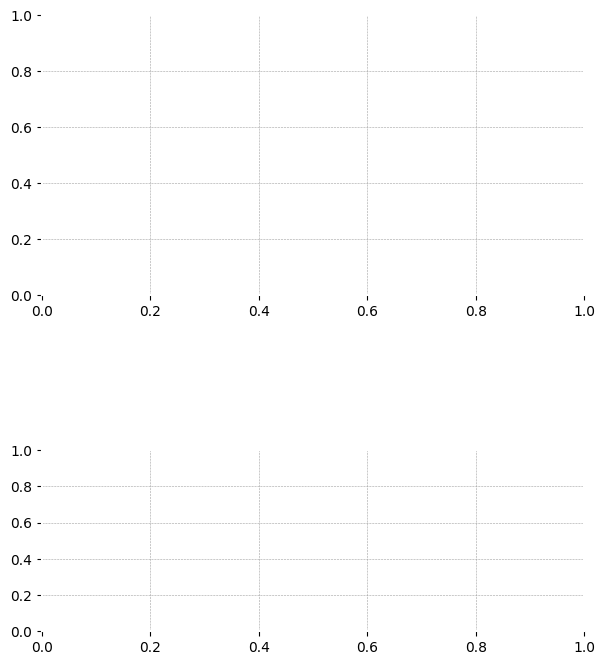

In [7]:
'''
Note that presently mplfinance does not support "blitting" (blitting makes animation
more efficient).  Nonetheless, the animation is efficient enough to update at least
once per second, and typically more frequently depending on the size of the plot.
'''
import pandas as pd
import mplfinance as mpf
import matplotlib.animation as animation

idf = history_price_hmsp
idf.shape
idf.head(3)
idf.tail(3)
df = idf.loc['2011-07-01':'2011-12-30',:]

fig = mpf.figure(style='charles',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(3,1,3)

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(20+ival)]
    ax1.clear()
    ax2.clear()
    mpf.plot(data,ax=ax1,volume=ax2,type='candle')

ani = animation.FuncAnimation(fig, animate, interval=250)

mpf.show()

In [8]:
#Dividen & Stock splits history
hmsp.get_actions(proxy="PROXY_SERVER")

,Dividends,Stock Splits
Date,,
2022-06-20,63.3,0.0


In [14]:
hmsp.get_balance_sheet(proxy="PROXY_SERVER")

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Capital Surplus,2.064064e+13,2.058637e+13,2.056808e+13,2.054615e+13
Total Liab,2.389902e+13,1.943260e+13,1.522308e+13,1.124417e+13
Total Stockholder Equity,2.919141e+13,3.024143e+13,3.567973e+13,3.535825e+13
Other Current Liab,8.583440e+11,1.356704e+12,1.537608e+12,1.012673e+12
Total Assets,5.309043e+13,4.967403e+13,5.090281e+13,4.660242e+13
Common Stock,4.652720e+11,4.652720e+11,4.652720e+11,4.652720e+11
Other Current Assets,1.911736e+12,1.780848e+12,1.287648e+12,1.007738e+12
Retained Earnings,7.469336e+12,8.573617e+12,1.402996e+13,1.373067e+13
Other Liab,1.746976e+12,2.494653e+12,2.238752e+12,2.369519e+12
Good Will,6.042300e+10,6.042300e+10,6.042300e+10,6.042300e+10


In [12]:
data_cashflow = hmsp.get_cashflow(proxy="PROXY_SERVER")
data_cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Investments,6.883370e+11,-3.083800e+11,8.731030e+11,1.100408e+12
Change To Liabilities,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total Cashflows From Investing Activities,3.344480e+11,-8.637280e+11,-5.671000e+10,3.335910e+11
Net Borrowings,-1.295510e+11,-1.707910e+11,-1.525230e+11,-3.144200e+10
Total Cash From Financing Activities,-8.597507e+12,-1.410570e+13,-1.378500e+13,-1.251237e+13
Net Income,7.137097e+12,8.581378e+12,1.372151e+13,1.353842e+13
Change In Cash,2.039347e+12,-3.016386e+12,3.304256e+12,8.014702e+12
Total Cash From Operating Activities,1.030241e+13,1.195304e+13,1.714597e+13,2.019348e+13
Depreciation,1.180156e+12,1.349396e+12,1.396105e+12,9.738860e+11
Other Cashflows From Investing Activities,-2.078300e+10,6.225000e+09,6.225000e+09,-5.443000e+09


In [ ]:
#import yfinance as yf

#tickers = yf.Tickers('msft aapl goog')

#print(tickers.tickers['GOOG'].actions)
#print(tickers.tickers['GOOG'].history(period="1mo"))
#print(tickers.tickers['GOOG'].info)

## **2. Prediction**

In [ ]:
from math import sqrt
from pandas import Series
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(16,12), dpi=80, facecolor='w', edgecolor='k')
from matplotlib.pylab import rcParams

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import sys
import itertools

import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv('/content/HMSP.csv')
del data['HMSP.JK']
del data['Volume']
del data['Open']
del data['High']
del data['Low']
del data['Close']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       40 non-null     object 
 1   Adj Close  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 768.0+ bytes


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
print(data.dtypes)

Date         datetime64[ns]
Adj Close           float64
dtype: object


In [ ]:
data = data.set_index(['Date'])
print(data.describe().T.round(2))

           count     mean     std     min    25%      50%      75%      max
Adj Close   37.0  1182.03  276.77  868.15  930.0  1161.94  1352.64  1772.59


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2019-10-01 to 2022-09-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  37 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


### ***2.1 Time Series Plot***

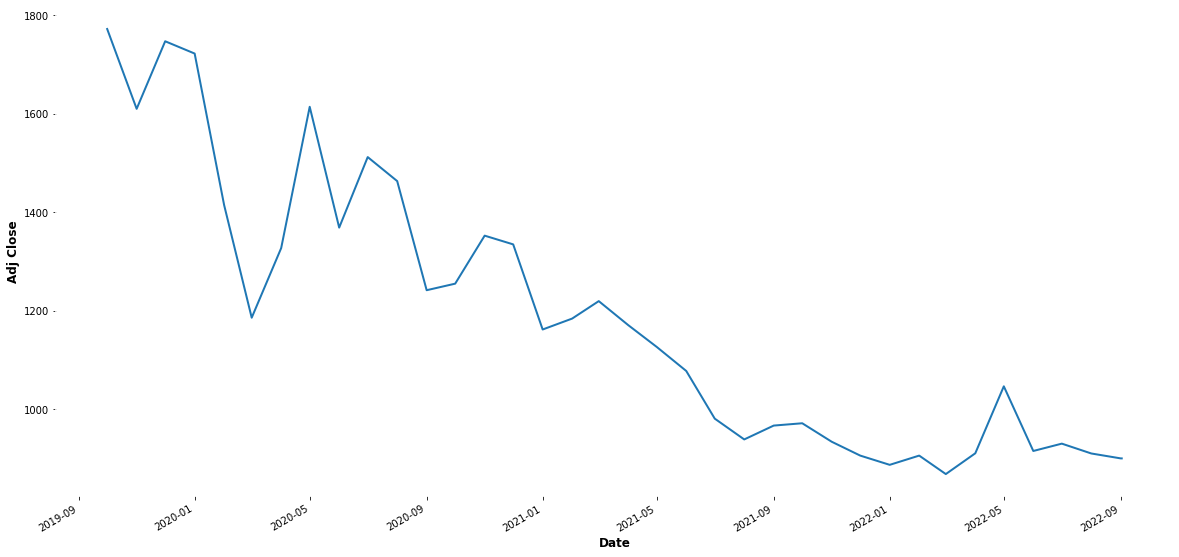

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Date")
plty.ylabel("Adj Close")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data.dropna(), label='HMSP')
fig.autofmt_xdate()
plty.grid()
plty.show()

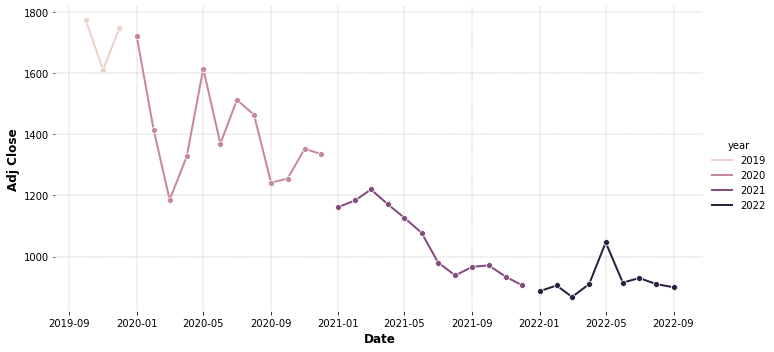

In [ ]:
# Seasonal plot 
data = data.dropna()

data2 = data.reset_index()
data2['year'] = pd.DatetimeIndex(data2['Date']).year
data2['month'] = pd.DatetimeIndex(data2['Date']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'Date', y = 'Adj Close', hue = 'year', aspect = 2, marker='o' )

### ***2.2 Stationarity Check***

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()

print('15 baris pertama rolling mean:\n', "-------------------------------------------------------")
print(rolmean.head(15))                
print ('')

print('15 baris pertama std. deviasi:\n', "-------------------------------------------------------")
print(rolstd.head(15))  

15 baris pertama rolling mean:
 -------------------------------------------------------
              Adj Close
Date                   
2019-10-01          NaN
2019-11-01          NaN
2019-12-01          NaN
2020-01-01          NaN
2020-02-01          NaN
2020-03-01          NaN
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          NaN
2020-07-01          NaN
2020-08-01          NaN
2020-09-01  1498.518870
2020-10-01  1455.392059
2020-11-01  1433.919179
2020-12-01  1399.525187

15 baris pertama std. deviasi:
 -------------------------------------------------------
             Adj Close
Date                  
2019-10-01         NaN
2019-11-01         NaN
2019-12-01         NaN
2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01         NaN
2020-05-01         NaN
2020-06-01         NaN
2020-07-01         NaN
2020-08-01         NaN
2020-09-01  198.064010
2020-10-01  189.101406
2020-11-01  184.483768
2020-12-01  157.125607


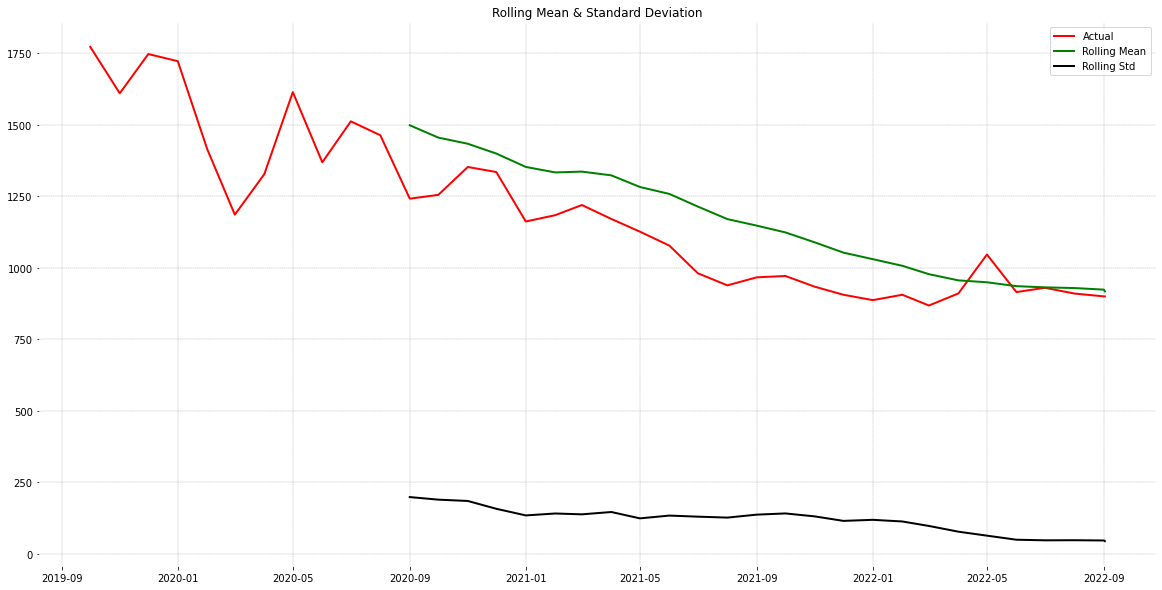

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data.dropna(), color='red', label='Actual')
mean_6=plt.plot(rolmean.dropna(), color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd.dropna(), color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

> Data aktual dan rolling(mean dan std) diketahui memiliki bentuk yang serupa, mengasumsikan bahwa series ini **stasioner**

In [ ]:
# menggunakan function adfuller() yang diterapkan pada variable #Passengers
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Adj Close'], autolag='AIC')

# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Dickey-Fuller Test: 
Test Statistic          -2.265468
p-value                  0.183347
Lags Used                2.000000
No. of Obs              34.000000
Critical Value (1%)     -3.639224
Critical Value (5%)     -2.951230
Critical Value (10%)    -2.614447
dtype: float64


> gagal menolak null hipotesis, ADF statistic > dari critical values pada semua tingkat, P-value > 0.05(alpha). data time series ini Strongly non-stationary.

<Figure size 1440x720 with 0 Axes>

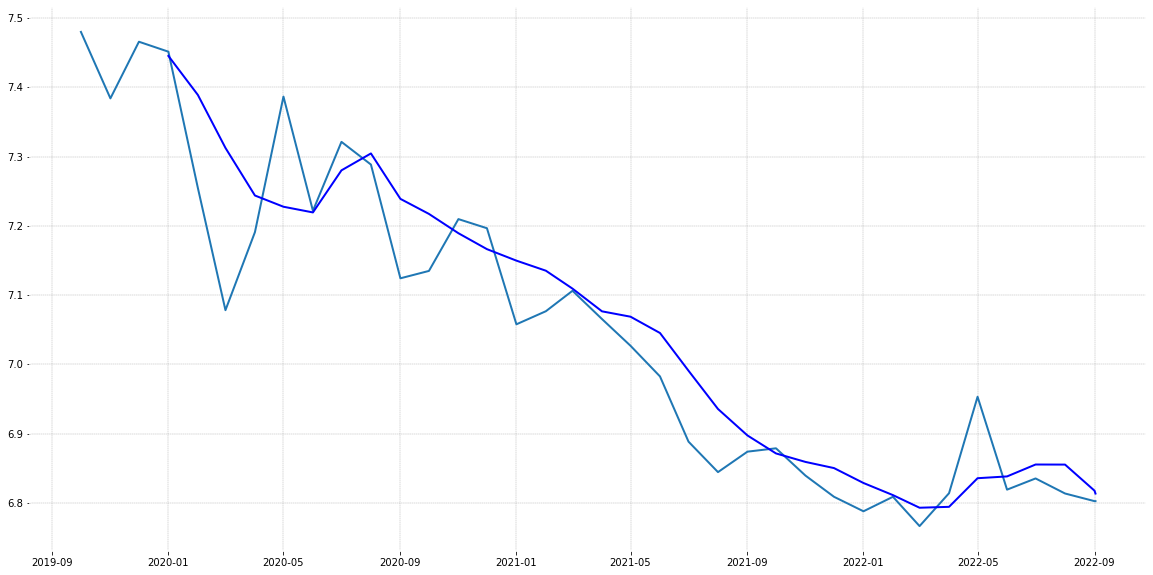

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(data) 

# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=4).mean() 
MStd=data_log.rolling(window=4).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,Adj Close
Date,
2019-10-01,NaN
2019-11-01,NaN
2019-12-01,NaN
2020-01-01,0.006120
2020-02-01,-0.134427
2020-03-01,-0.234400
2020-04-01,-0.052932
2020-05-01,0.159098
2020-06-01,0.002372


In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,Adj Close
Date,
2020-01-01,0.006120
2020-02-01,-0.134427
2020-03-01,-0.234400
2020-04-01,-0.052932
2020-05-01,0.159098


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=4).mean()
    rolstd=timeseries.rolling(window=4).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Adj Close'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  

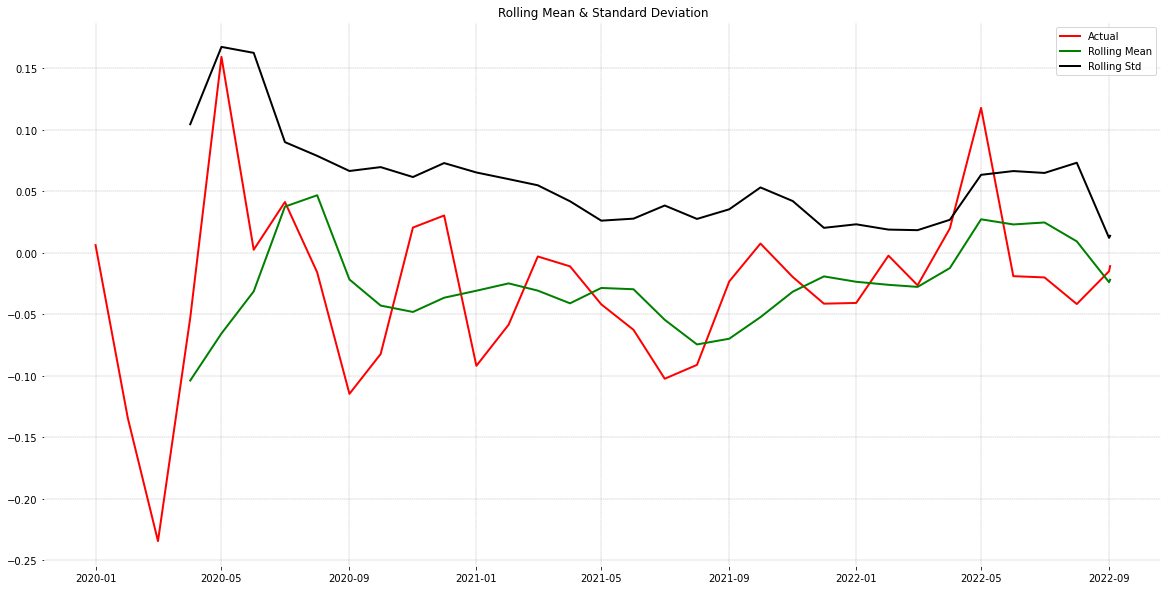

Dickey-Fuller Test: 
Test Statistic          -5.408939
p-value                  0.000003
Lags Used                1.000000
No. of Obs              32.000000
Critical Value (1%)     -3.653520
Critical Value (5%)     -2.957219
Critical Value (10%)    -2.617588
dtype: float64


In [ ]:
stationarity(data_log_diff)

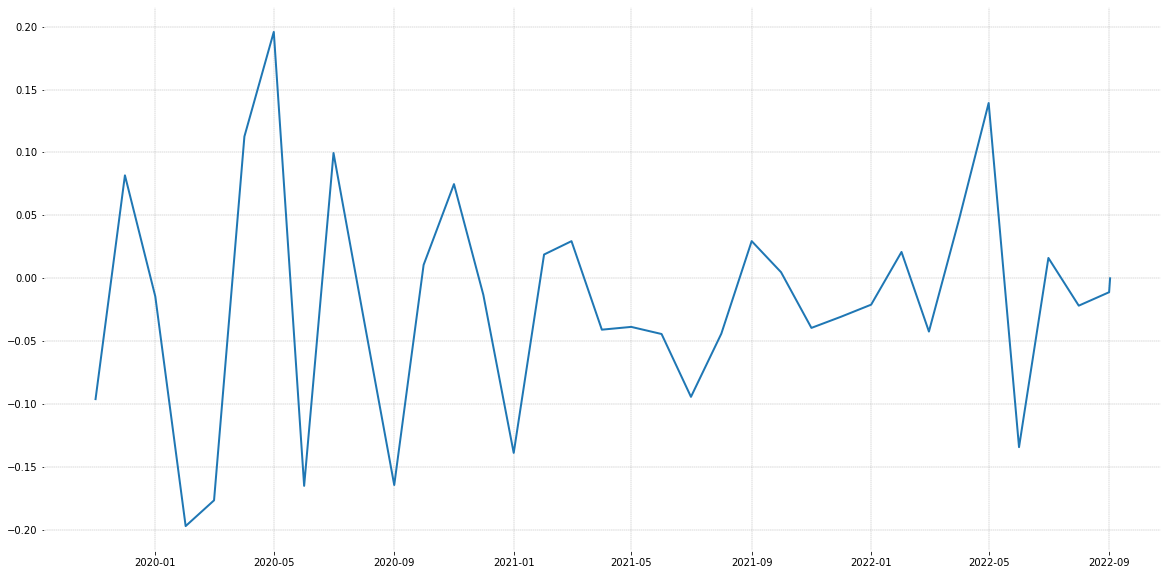

In [ ]:
#Stationarity shift test
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
data_shift.isna().sum()

Adj Close    1
dtype: int64

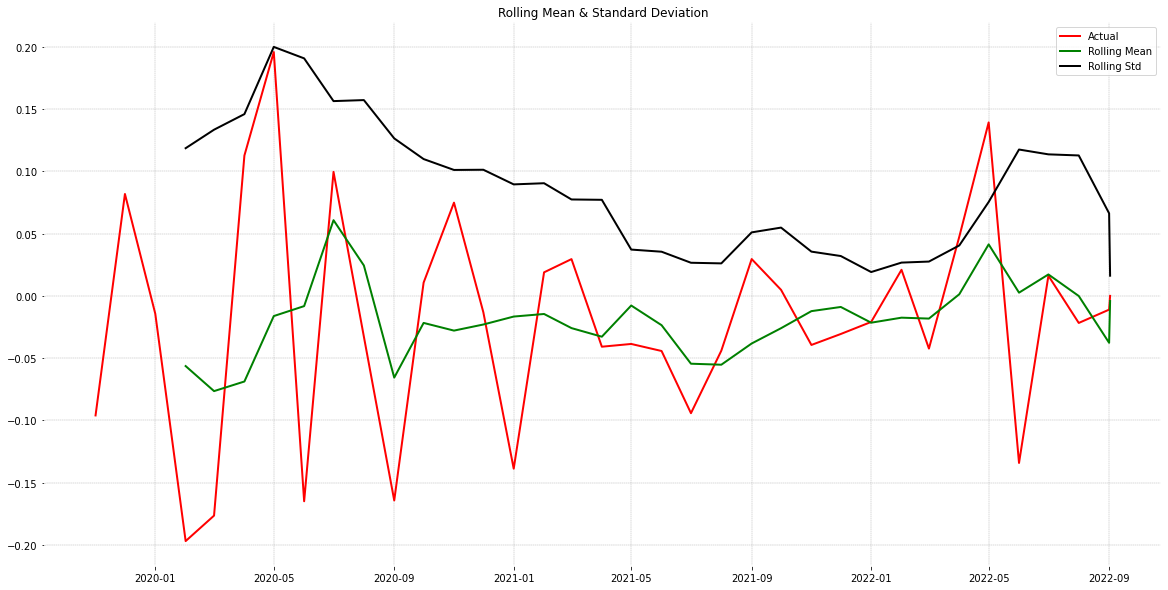

Dickey-Fuller Test: 
Test Statistic         -7.022200e+00
p-value                 6.499852e-10
Lags Used               1.000000e+00
No. of Obs              3.400000e+01
Critical Value (1%)    -3.639224e+00
Critical Value (5%)    -2.951230e+00
Critical Value (10%)   -2.614447e+00
dtype: float64


In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

> Dari data_shift di atas, hasil ADF test menunjukkan P-value < 0.05(alpha) sehingga reject null hipothesis dan menerima hypothesis yang mengindeikasikan bahwa series ini stasioner.

> Critical value pada 1%, 5%, 10% menunjukkan hal demikian. sehingga dalam observasi ini kita menyimpulkan bahwa series ini tidak mengalami perubahan pada perfeseran waktu.

### ***2.3 Decomposition and Autocorrelation Function***

In [ ]:
data_log

,Adj Close
Date,
2019-10-01,7.480199
2019-11-01,7.384185
2019-12-01,7.466015
2020-01-01,7.451626
2020-02-01,7.254706
2020-03-01,7.078249
2020-04-01,7.190951
2020-05-01,7.386765
2020-06-01,7.221818


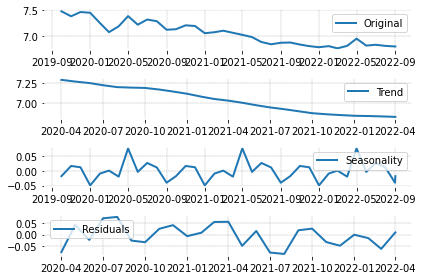

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log, period=12)
#decomp=seasonal_decompose(data_log, period=int(len(data_log)/4)) #Contoh syntax versi lainnya

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

>**Insight**

---

*   Dari proses seasonal decompose, maka akan terbagi menjadi grafik original, trend, seasonality, dan residual
*   Dapat dilihat bahwa HMSP secara historical price(Time Series) adalah trend yang semakin menaik, secara seasonality pergerak harga cenderung naik-turun terjadi dari bulan ke bulan.
* Pola residuals mengidentifikasikan seberapa jauh titik data dari garis regresi




In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
 Date
2019-10-01         NaN
2019-11-01         NaN
2019-12-01         NaN
2020-01-01         NaN
2020-02-01         NaN
2020-03-01         NaN
2020-04-01    7.289680
2020-05-01    7.268029
2020-06-01    7.249538
2020-07-01    7.221906
2020-08-01    7.198083
2020-09-01    7.191836
2020-10-01    7.187775
2020-11-01    7.167548
2020-12-01    7.142582
2021-01-01    7.114570
2021-02-01    7.078016
2021-03-01    7.049071
2021-04-01    7.027962
2021-05-01    7.001849
2021-06-01    6.970249
2021-07-01    6.942832
2021-08-01    6.920410
2021-09-01    6.895079
Name: trend, dtype: float64 

Seasonal 
 Date
2019-10-01   -0.018377
2019-11-01    0.016237
2019-12-01    0.011754
2020-01-01   -0.049580
2020-02-01   -0.009628
2020-03-01    0.000571
2020-04-01   -0.019917
2020-05-01    0.075749
2020-06-01   -0.003816
2020-07-01    0.026383
2020-08-01    0.011102
2020-09-01   -0.040480
2020-10-01   -0.018377
2020-11-01    0.016237
2020-12-01    0.011754
2021-01-01   -0.049580
2021-02-01   -0.00962

In [ ]:
# assign variable baru decomp_data dengan variabel residual di atas
decomp_data=residual.dropna()

# Panggil function stationarity dan terapkan pada decomp data yang tanpa NA value
#stationarity(decomp_data)

#### ***Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)***

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

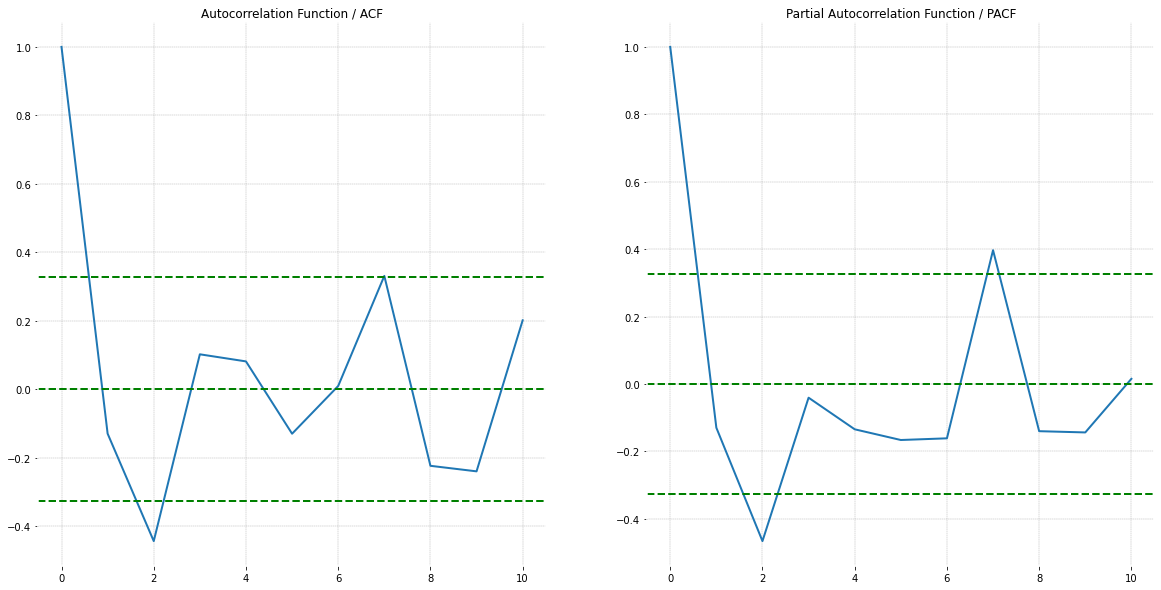

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=10)
lag_pacf=pacf(data_shift, nlags=10, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

## **3. Model Development**

In [ ]:
#Split data
train = data[0:int(len(data)*0.80)]
test = data[int(len(data)*0.80):]

In [ ]:
# HoltWinters
model_data = ExponentialSmoothing(np.asarray(train['Adj Close']),seasonal_periods=7, trend='add',seasonal='mul').fit(optimized=True)
data_Holt = test.copy()
data_Holt['Holt'] = model_data.forecast(len(test['Adj Close']))
data_Holt.tail()


,Adj Close,Holt
Date,,
2022-06-01,915.080078,735.406923
2022-07-01,930.000000,705.688483
2022-08-01,910.000000,683.623672
2022-09-01,900.000000,622.029164
2022-09-02,900.000000,573.661768


In [ ]:
model_data.params

{'smoothing_level': 0.00022902434774309317,
 'smoothing_trend': 1.6179828289385404e-07,
 'smoothing_seasonal': 0.8234836599307782,
 'damping_trend': nan,
 'initial_level': 1260.4614490700112,
 'initial_trend': -21.496306622283733,
 'initial_seasons': array([1.43644543, 1.31723516, 1.45715329, 1.46106687, 1.23082047,
        1.08048073, 1.22269392]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

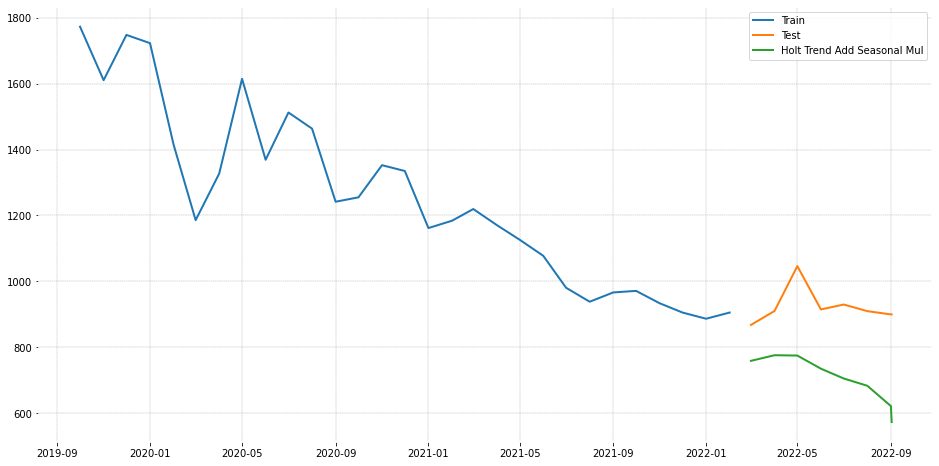

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

In [ ]:
# SARIMAX
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
train_log = np.log10(train['Adj Close'])

In [ ]:
for param in pdq: #Non-Seasonal
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal #Store the best param values : AIC, P, D, Q [Non-S / Seas]
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-97.65078725596723


In [ ]:
# tampilkan hasil dari SARIMAX
mod = sm.tsa.statespace.SARIMAX(train_log,
                                order=(0,1,0),
                                seasonal_order=(0,0,0,12),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017      0.000      3.599      0.000       0.001       0.003


In [ ]:
# Terapkan function get_prediction() pada best_results
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=True, full_results=True)
pred_dynamic

In [ ]:
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci

,lower Adj Close,upper Adj Close
2023-01-01,2.69087,3.223093


In [ ]:
pred99 = best_results.get_forecast(steps=29, alpha=0.1)
pred99

In [ ]:
# Extract the predicted and true values of our time series
# sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['HMSP_Price_Forecast'] = np.power(10, pred99.predicted_mean)

In [ ]:
testCopy.tail(10)

,Adj Close,HMSP_Price_Forecast
Date,,
2022-03-01,868.152893,905.694641
2022-04-01,910.387390,905.694641
2022-05-01,1046.476196,905.694641
2022-06-01,915.080078,905.694641
2022-07-01,930.000000,905.694641
2022-08-01,910.000000,905.694641
2022-09-01,900.000000,905.694641
2022-09-02,900.000000,NaN


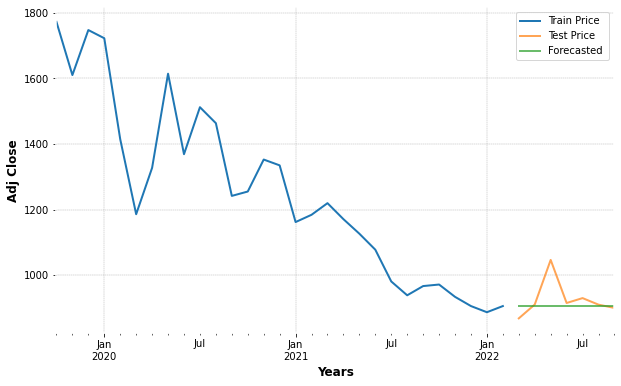

In [ ]:
# visualisasikan dari antara train, test, dan hasil forecast

axis = train['Adj Close'].plot(label='Train Price', figsize=(10, 6))
testCopy['Adj Close'].plot(ax=axis, label='Test Price', alpha=0.7)
testCopy['HMSP_Price_Forecast'].plot(ax=axis, label='Forecasted ', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Adj Close')
plt.legend(loc='best')
plt.show()
plt.close()

### Plot forecast with Confidence band
> tahap ini, kita akan melakukan visualisasi nilai prediksi beserta interval keyakinan

In [ ]:
# Forecast Adj Close Price using the best fit model
# Get forecast 36 steps (3 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 12
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2022-10-01,905.694641,752.915361,1089.475426,752.915361,1089.475426
2022-11-01,905.694641,697.447415,1176.121332,697.447415,1176.121332
2022-12-01,905.694641,657.672368,1247.251402,657.672368,1247.251402
2023-01-01,905.694641,625.908027,1310.548432,625.908027,1310.548432
2023-02-01,905.694641,599.196760,1368.970658,599.196760,1368.970658


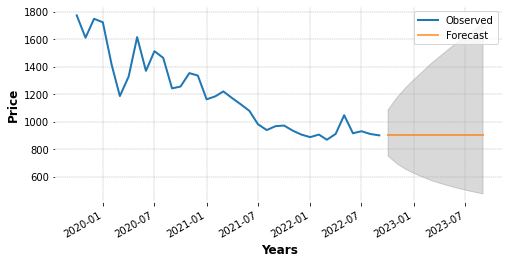

In [ ]:
# plot the forecast along with the confidence band
axis = data['Adj Close'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.show()

## **4. Model Evaluation**

> Sekarang kita akan melakukan validasi dan evaluasi terhadap model yang telah kita buat


**Plot ACF and PACF for residuals of SARIMAX model**

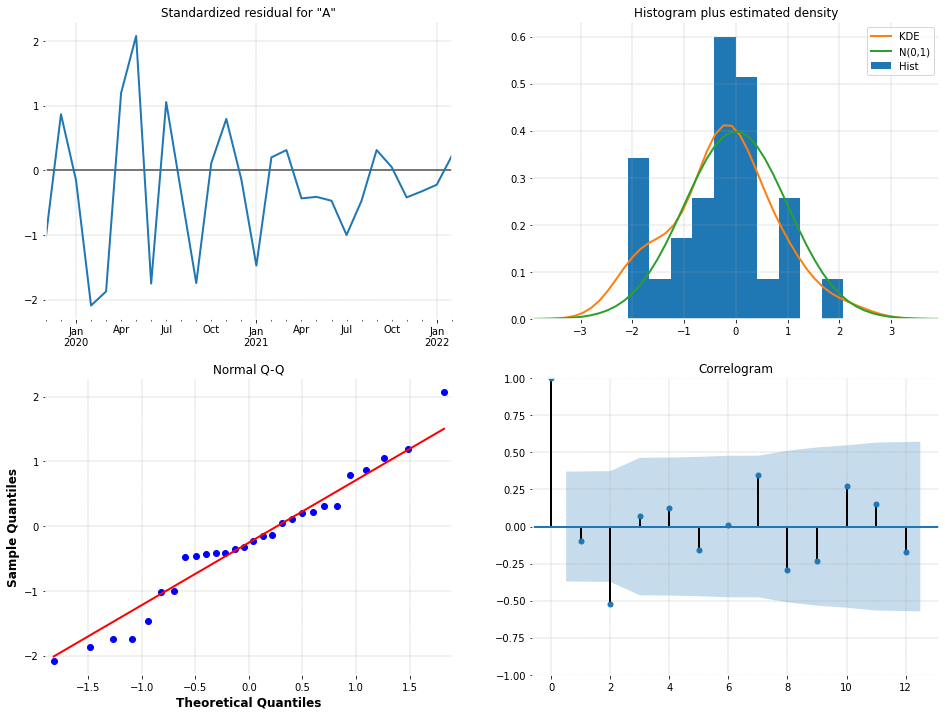

In [ ]:
best_results.plot_diagnostics(lags=12, figsize=(16,12))
plt.show()

> Model Performance basen on MAE, MSE, RMSE, MAPE

* Model HoltWinters

In [ ]:
# Hitung MAE pada model HoltWinters menggunakan function yang dibuat dari awal
def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

# Hitung MAPE pada model HoltWinters
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung MSE dan RMSE pada model HoltWinters
mse = ((test['Adj Close'] - data_Holt['Holt']) ** 2).mean()
rmse = np.sqrt(mse)

print('Mean Absolute Error of our forecasts is ', mean_absolute_error(test['Adj Close'],data_Holt['Holt']).round(3))
print('Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(test['Adj Close'],data_Holt['Holt']).round(2), ' %')
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 3)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

Mean Absolute Error of our forecasts is  218.612
Mean Absolute Percentage Error of our forecasts is  23.62  %
The Mean Squared Error of our forecasts is 52625.404
The Root Mean Squared Error of our forecasts is 229.402


* Model SARIMAX

In [ ]:
# Import module metrics dan panggil functionnya
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#y_true = test['Adj Close']
#y_pred = testCopy['HMSP_Price_Forecast']

#print ('The Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true, y_pred).round(2))
#print ('The Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true, y_pred).round(3), '%')
#print ('The Mean Squared Error of our forecasts is ', mean_squared_error(y_true, y_pred).round(3))
#print ('The Root Mean Squared Error of our forecasts is ', np.sqrt(mean_squared_error(y_true, y_pred)).round(3))

## **5. Export Result to CSV**

In [ ]:
import yfinance as yf
data = yf.download("HMSP.JK", start="2017-01-01", end="2017-04-30")

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

In [ ]:
#Download each ticker and save it to a separate file
tickerStrings=['HMSP.JK']
for ticker in tickerStrings:
  data = yf.download(ticker, group_by="Ticker", period= "3y", interval= "1mo")
  data['HMSP.JK'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
  data.to_csv(f'HMSP.csv')  # ticker_AAPL.csv for example

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Download all tickers into single dataframe with single level column headers

#tickerStrings = ['GGRM.JK', 'WIIM.JK']
#df_list = list()
#for ticker in tickerStrings:
    #data = yf.download(ticker, group_by="Ticker", period='ytd', interval= "1wk")
    #data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    #df_list.append(data)

# combine all dataframes into a single dataframe
#df = pd.concat(df_list)

# save to csv
#df.to_csv('ticker.csv')